# import packages

In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
import scipy
import pickle
import yaml
import time

import matplotlib


# define paths

In [2]:
# You must define the path to the raw data (downloaded from the database)
# the raw data to plot example cells is not part of the github directory
data_folder = '/Users/kperks/mnt/OneDrive - wesleyan.edu/Research/Manuscripts/GRC_PerksSawtell/AcceptedRevision_CellReports/data_raw'

In [3]:
top_dir = Path.cwd().resolve().parents[0] #this is the path to the folder you should be running these notebooks from (Perks_Sawtell_2022)

#primary resource folders:
script_folder = top_dir / 'scripts'
# data_folder = top_dir / 'data_raw'

#folders with processed data:
df_folder = top_dir / 'data_processed/df_cmdintact'
meta_data_folder = top_dir / 'data_processed/GRC_properties_Meta'

#where to save any figures that are generated:
#change as needed. Default is the location where Perks_Sawtell_2022 lives (if you are running this script from that folder)
figure_folder = Path.cwd().resolve().parents[1] / 'Perks_Sawtell_2022_FiguresComponents'

#for storing simulation states
sim_filename = 'grc_model_initialized.pickle'
sim_filepath = top_dir / 'data_processed/grc_model_simulations' / sim_filename 

# import custom functions from scripts folder

In [4]:
sys.path.append(script_folder)
from ClassDef_AmplitudeShift_Stable import AmpShift_Stable #this is the function that imports all of the cell_data structures. Needed if plotting any example cells. 
from FunctionDefinitions import *

# configure figure styles

In [5]:
# configure figure stylessns.set_style("ticks")
sns.set_context("paper")
rc = set_fig_style()
matplotlib.rcParams.update(rc)

In [6]:
import matplotlib.colors as colors
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

# Define datafile pre-processed from Nate

In [7]:
processed_datafile = top_dir / 'data_processed/Figure6Data/Figure6_summaryforfigure_kp.xlsx'

# Import Panel D and plot

In [8]:
# plt.cm.plasma(np.linspace(0.2,0.85,13))
newmap = truncate_colormap(plt.cm.plasma, minval=0.2, maxval=0.85, n=13)

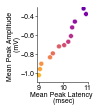

In [9]:
sheet = '20211201_011'
df = pd.read_excel(processed_datafile,sheet_name=sheet)

df = df.sort_values('stimamp')

df['stimamp_percent'] = np.round(100*((df['stimamp']/250)-1))
df['peak_latency'] = df['peak_latency']*1000

hfig,ax = create_fig_tuning()
sns.scatterplot(x='peak_latency',y='peak_amp',hue='stimamp_percent',data=df,
               ax=ax,legend=False,palette=newmap)

ax.set_ylabel('Mean Peak Amplitude \n (mV)',linespacing=0.9)
ax.set_xlabel('Mean Peak Latency \n (msec)',linespacing=0.9)
# ax.set_xlim(8,13)
ax.set_ylim(-1.1,-0.3);

sns.despine(hfig)
# figsave(figure_folder,'Fig6_scatter'+sheet)

In [17]:
df['stimamp_percent']

12   -30.0
10   -25.0
8    -20.0
6    -15.0
4    -10.0
2     -5.0
0      0.0
1      5.0
3     10.0
5     15.0
7     20.0
9     25.0
11    30.0
Name: stimamp_percent, dtype: float64

# Import Panel E and plot

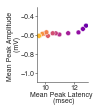

In [157]:
sheet='20211201_007'

df = pd.read_excel(processed_datafile,sheet_name=sheet)

df = df.sort_values('stimamp')

df['stimamp_percent'] = np.round(100*((df['stimamp']/250)-1))
df['peak_latency'] = df['peak_latency']*1000

hfig,ax = create_fig_tuning()
sns.scatterplot(x='peak_latency',y='peak_amp',hue='stimamp_percent',data=df,
               ax=ax,legend=False,palette=newmap)

ax.set_ylabel('Mean Peak Amplitude \n (mV)',linespacing=0.9)
ax.set_xlabel('Mean Peak Latency \n (msec)',linespacing=0.9)
# ax.set_xlim(8,13)
ax.set_ylim(-1.1,-0.3);

sns.despine(hfig)
figsave(figure_folder,'Fig6_scatter'+sheet)

# Import Panel F and plot

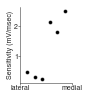

In [25]:
sheet='slope_ML'

df = pd.read_excel(processed_datafile,sheet_name=sheet)
df['slope']=df['slope']/100

hfig,ax = create_fig_tuning()
sns.scatterplot(x='track',y='slope',data=df,
               ax=ax,legend=False,color='black',s=15)
ax.set_xticks([0,7])
ax.set_xticklabels(['lateral','medial'])
ax.set_xlabel('')

ax.set_ylabel('Sensitivity (mV/msec)',linespacing=0.9)
# ax.set_xlabel('Mean Peak Latency \n (msec)',linespacing=0.9)
# ax.set_xlim(8,13)
# ax.set_ylim(-1.1,-0.3);

sns.despine(hfig)

figsave(figure_folder,'Fig6_scatter'+sheet)

# Import Panel G and plot

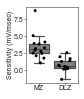

In [26]:
sheet='sensitivity'

df = pd.read_excel(processed_datafile,sheet_name=sheet)
df = pd.melt(df,id_vars=['fish'],value_vars=['MZ','DLZ'])

df['variable']=df['variable'].astype('string')
df['fish']=df['fish'].astype('int')
df['value']=df['value'].astype('float')

hfig,ax = create_fig_tuning()

ax = sns.boxplot(x="variable", y="value", data=df,color = 'grey', showfliers=False)
# sns.stripplot(x='variable',y='value',hue='fish',data = df,
#              ax=ax,s=5,alpha=0.5,jitter=0.25)
sns.stripplot(x='variable',y='value',data = df,
             ax=ax,s=3,color='black',jitter=0.25)
plt.legend([],[], frameon=False)
ax.set_ylabel('Sensitivity (mV/msec)');
ax.set_xlabel('')

figsave(figure_folder,'Fig6_scatter'+sheet)

In [32]:
sheet='sensitivity'

df = pd.read_excel(processed_datafile,sheet_name=sheet)
scipy.stats.ttest_ind(df['MZ'], df['DLZ'], equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=4.603638147546896, pvalue=0.0001675916731583152)

# Import Panel H and plot

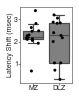

In [22]:
sheet='latency_shift'

df = pd.read_excel(processed_datafile,sheet_name=sheet)
df = pd.melt(df,id_vars=['fish'],value_vars=['MZ','DLZ'])

df['variable']=df['variable'].astype('string')
df['fish']=df['fish'].astype('int')
df['value']=df['value'].astype('float')*1000

hfig,ax = create_fig_tuning()

ax = sns.boxplot(x="variable", y="value", data=df,color = 'grey', showfliers=False)
sns.stripplot(x='variable',y='value',data = df,
             ax=ax,s=3,color='black',jitter=0.25)
plt.legend([],[], frameon=False)
ax.set_ylabel('Latency Shift (msec)');
ax.set_xlabel('')

figsave(figure_folder,'Fig6_scatter'+sheet)

In [33]:
sheet='latency_shift'

df = pd.read_excel(processed_datafile,sheet_name=sheet)
scipy.stats.ttest_ind(df['MZ'], df['DLZ'], equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=0.6332764155294383, pvalue=0.5338946348780096)

# Import Panel I and plot

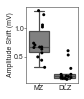

In [24]:
sheet='amp_change'

df = pd.read_excel(processed_datafile,sheet_name=sheet)
df = pd.melt(df,id_vars=['fish'],value_vars=['MZ','DLZ'])

df['variable']=df['variable'].astype('string')
df['fish']=df['fish'].astype('int')
df['value']=df['value'].astype('float')

hfig,ax = create_fig_tuning()

ax = sns.boxplot(x="variable", y="value", data=df,color = 'grey', showfliers=False)
sns.stripplot(x='variable',y='value',data = df,
             ax=ax,s=3,color='black',jitter=0.25)
plt.legend([],[], frameon=False)
ax.set_ylabel('Amplitude Shift (mV)');
ax.set_xlabel('')

figsave(figure_folder,'Fig6_scatter'+sheet)

In [34]:
sheet='amp_change'

df = pd.read_excel(processed_datafile,sheet_name=sheet)
scipy.stats.ttest_ind(df['MZ'], df['DLZ'], equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=5.81346178544406, pvalue=1.0175443794799167e-05)

# Import waveforms and plot A 

In [10]:
directory = top_dir / 'data_processed/Figure6Data/waves/'

stimamp = np.asarray([int(file.parts[-1].split('(')[0][0:3]) for file in Path(directory).glob('*.txt')])
stimamp = np.round(100*((stimamp/250)-1))
_ = [file.parts[-1].split('(')[1] for file in Path(directory).glob('*.txt')]
cellid = [s.split(')')[0] for s in _]

In [81]:
stimamp

array([ 10., -15.,  25.,  -5.,  20.,  25., -10.,  -5.,  10., -25., -15.,
       -25.,   5.,   0.,   0.,  15., -10., -20., -20.,  20.,   5.,  15.])

In [11]:
wavmean = []
wavsem = []
for file in Path(directory).glob('*.txt'):
    data = pd.read_csv(file, sep="\t", header=None)
    data.columns = ["time", "mean", "sem"]
    data = data.drop(0,axis=0)
    data = data.astype('float')
    wavmean.append(data['mean'].values)
    wavsem.append(data['sem'].values)
    xtime = data['time'].values*1000
    
wavmean = np.asarray(wavmean).T
wavsem = np.asarray(wavsem).T

In [8]:
def search(list, ID):
    boolarray = []
    for i in range(len(list)):
        if list[i] == ID:
            boolarray.append(True)
        if list[i] != ID:
            boolarray.append(False)
    return boolarray

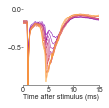

In [19]:
cell = '20211201_011'

thisid = search(cellid,cell)

thiswavs = wavmean[:,thisid]
thisamp = stimamp[thisid]

sortedinds = np.argsort(thisamp)
thisamp = thisamp[sortedinds]
thiswavs = thiswavs[:,sortedinds]


colinds = plt.cm.plasma(np.linspace(0.2,0.85,13))
# colinds = np.asarray([c for c in reversed(colinds)])

hfig,ax = create_fig()
for i,sweep in enumerate(thiswavs.T):
    ax.plot(xtime-4.5,sweep,color = colinds[i+1],lw = 0.5);

ax.set_xlabel('Time after stimulus (ms)')
ax.set_yticks([-0.5,0])
ax.set_xticks(np.arange(0,20,5))
ax.set_xlim(0,15)
ax.set_ylim(-1,0)

sns.despine(hfig)
ax.set_frame_on(True)
yax = ax.spines["left"]
yax.set_visible(False)

figsave(figure_folder,'Fig6_LFPwavs_'+cell )

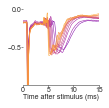

In [18]:
cell = '20211201_007'

thisid = search(cellid,cell)

thiswavs = wavmean[:,thisid]
thisamp = stimamp[thisid]

sortedinds = np.argsort(thisamp)
thisamp = thisamp[sortedinds]
thiswavs = thiswavs[:,sortedinds]


colinds = plt.cm.plasma(np.linspace(0.2,0.85,13))
# colinds = np.asarray([c for c in reversed(colinds)])

hfig,ax = create_fig()
coloroffset = 1
for i,sweep in enumerate(thiswavs.T):
    ax.plot(xtime-4.5,sweep,color = colinds[i+1],lw = 0.5);

ax.set_xlabel('Time after stimulus (ms)')
ax.set_yticks([-0.5,0])
ax.set_xticks(np.arange(0,20,5))
ax.set_xlim(0,15)
ax.set_ylim(-1,0)
sns.despine(hfig)
ax.set_frame_on(True)
yax = ax.spines["left"]
yax.set_visible(False)

figsave(figure_folder,'Fig6_LFPwavs_'+cell )

In [13]:
thisamp

array([-25., -20., -15., -10.,  -5.,   0.,   5.,  10.,  15.,  20.,  25.])